In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm
import time
import glob

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel

# to account for updates when files change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def save_seir_df(res, pop, ntype, seed,
                 beta, gamma, delta,
                 init_inf_frac, init_rec_frac):
    seed_df = pd.DataFrame([res.S, res.E, 
                        res.I, res.R]).T
    seed_df.columns = ['S','E','I','R']
    # use "values", because "iloc" saves index info 
    # and messes with calculation
    beta_calc = - seed_df.S.diff().values[1:] / (
                            seed_df.S.values[:-1] * seed_df.I.values[:-1]
                            )
    # the last Beta value cannot be calculated: no S_{t+1}
    seed_df['Beta'] = [*beta_calc, 0] 
    seed_df.fillna(0, inplace=True)
    
    params = [beta, gamma, delta, init_inf_frac, init_rec_frac]
    params_str = '_'.join([str(i) for i in params])
    
    seed_dir = f'../sim_data/new_{ntype}_{pop}/'
    if not os.path.exists(seed_dir):
        os.makedirs(seed_dir)
    seed_df.to_csv(seed_dir + f'p_{params_str}_seed_{seed}.csv', 
                   index=False)

In [3]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)


pop = 10**5
ntype = 'ba'
network_model = SEIRNetworkModel(pop, ntype)

gamma = 0.1 # rate: E -> I
delta = 0.1 # recovery rate: I -> R
# fraction of initially infected
init_inf_frac = 0.005 

# fraction of initially recovered
init_rec_frac_arr = np.arange(0, 0.3, 0.05)
# transmission rate
beta_arr = np.arange(0.1, 1., 0.05)
n_runs = 15

for beta in tqdm.tqdm(beta_arr):
    for init_rec_frac in init_rec_frac_arr:
        for seed in range(n_runs):
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

  0%|          | 0/18 [00:00<?, ?it/s]C:\Users\105\AppData\Local\Temp\ipykernel_23088\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_23088\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_23088\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_23088\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_23088\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_23088\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed

In [4]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 10**4
ntype = 'ba'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

gamma = 0.1 # rate: E -> I
delta = 0.08 # recovery rate: I -> R
# fraction of initially infected

# fraction of initially recovered
init_rec_frac = 0
# transmission rate
beta_arr = np.arange(0.04, 0.09, 0.01)
init_inf_frac_arr = np.arange(0.005, 0.011, 0.001)

n_runs = 5
times = []
for beta in tqdm.tqdm(beta_arr):
    for init_inf_frac in init_inf_frac_arr:
        for seed in range(n_runs):
            start_time = time.time()
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            end_time = time.time()
            times.append(end_time-start_time)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

ba


  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\105\AppData\Local\Temp\ipykernel_16948\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_16948\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_16948\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_16948\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_16948\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_16948\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_

In [5]:
# 0.7 +- 0.08
np.array(times).mean(), np.array(times).std()

(np.float64(0.7026249361038208), np.float64(0.082820497811629))

In [7]:
times[0]

0.6603782176971436

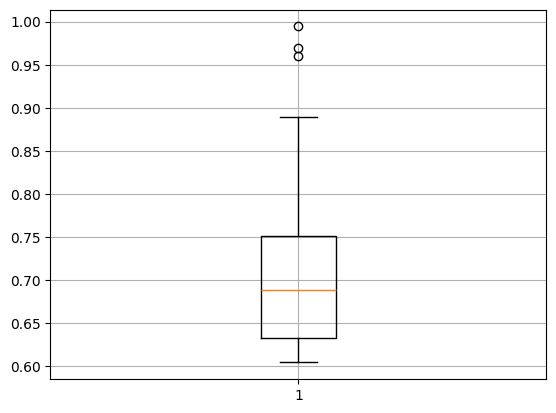

In [6]:
plt.boxplot(np.array(times));
plt.grid()

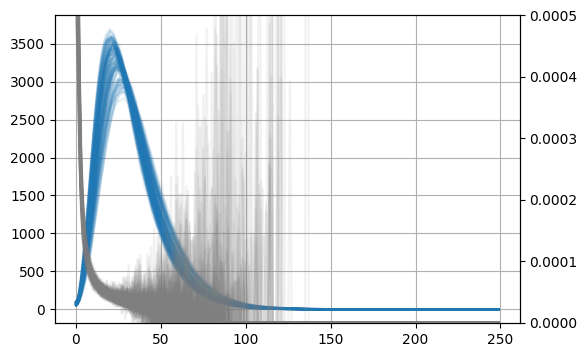

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_ba_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)
    
ax_beta.set_ylim(-1e-6,5e-4)
ax.grid()

(-1e-06, 0.0001)

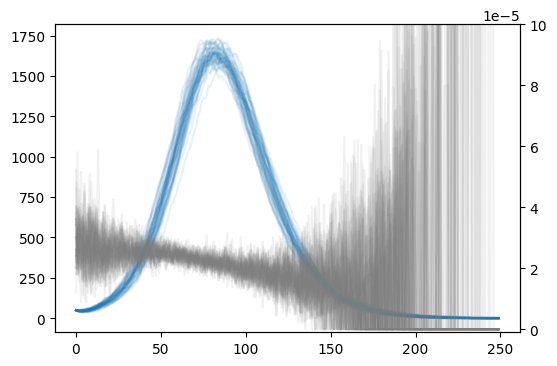

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_r_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)
    
ax_beta.set_ylim(-1e-6,1e-4)

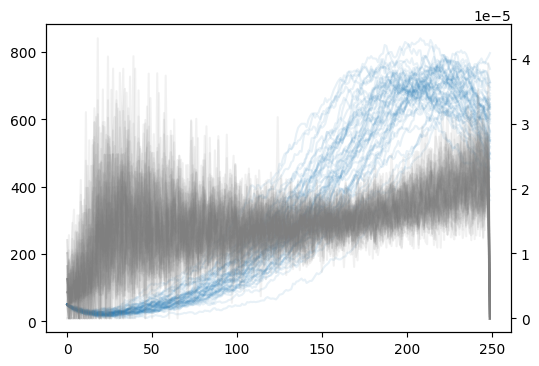

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_sw_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)

In [87]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)


pop = 10**4
ntype = 'ba'
network_model = SEIRNetworkModel(pop, ntype)

gamma = 0.1 # rate: E -> I
delta = 0.1 # recovery rate: I -> R
# fraction of initially infected
init_inf_frac = 0.005 

# fraction of initially recovered
init_rec_frac_arr = np.arange(0, 0.3, 0.05)
# transmission rate
beta_arr = np.arange(0.1, 1., 0.05)
n_runs = 15

for beta in tqdm.tqdm(beta_arr):
    for init_rec_frac in init_rec_frac_arr:
        for seed in range(n_runs):
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

  0%|          | 0/18 [00:00<?, ?it/s]C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.

In [3]:
np.arange(0.1, 1., 0.05)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

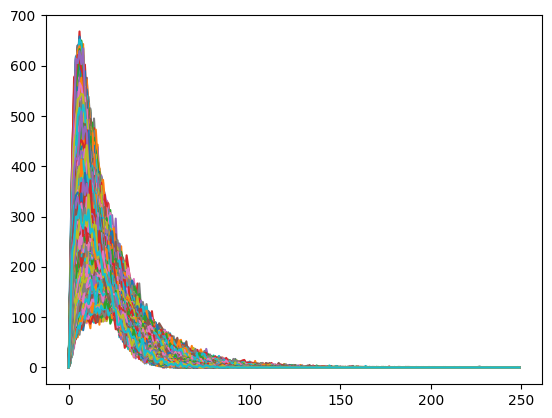

In [88]:
for i in range(dataset.shape[0]):
    plt.plot(dataset.values[i][5:])

In [90]:
dataset.values[i][5:].argmax()

np.int64(6)